In [ ]:
# Useful starting lines
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Import Libraries

In [2]:
from helpers_data import *
from proj1_helpers import *
from implementations import *
import numpy as np
import matplotlib.pyplot as plt

# Data Loading

In [3]:
DATA_TRAIN_PATH = '../Data/train.csv' # TODO: download train data and supply path here 
y, tX, ids = load_csv_data(DATA_TRAIN_PATH)
features = np.genfromtxt(DATA_TRAIN_PATH, usecols=np.arange(2,32), delimiter=",", dtype=str, max_rows=1)

# Exploratory Data Analysis

In [ ]:
nobs = len(y)
print("# of observations: {nob}".format(nob=nobs))
print("# of features: {nf}".format(nf=tX.shape[1]))

# of observations: 250000
# of features: 30


In [ ]:
na_per_obs(tX, nobs, name = "Original Tx")
na_per_feature(tX, nobs, name = "Original Tx")

Original Tx: # of Unavailable Data for each Observation:
Number of Observations with at least one unavailable data: 181886, which is 72.7544% of all data
Original Tx# of features with unavailable data: 11
Original Tx# of features with unavailable data more than 70%: 7


In [ ]:
max_unique = 100
inds, nouns = find_categorical_data(tX, max_unique)
print("# of categorical data is {catnum}".format(catnum=len(inds)))
print("The name of the categorical data is {nm}".format(nm=features[inds]))
print("The number of unique values for this categorical data is {un}".format(un=np.sum(nouns)))
print("The other {nm} features are numerical data".format(nm=tX.shape[1]-len(inds)))

# of categorical data is 1
The name of the categorical data is ['PRI_jet_num']
The number of unique values for this categorical data is 4
The other 29 features are numerical data


Text(0.5, 1.0, 'Correlation Matrix Before Doing Any Processing')

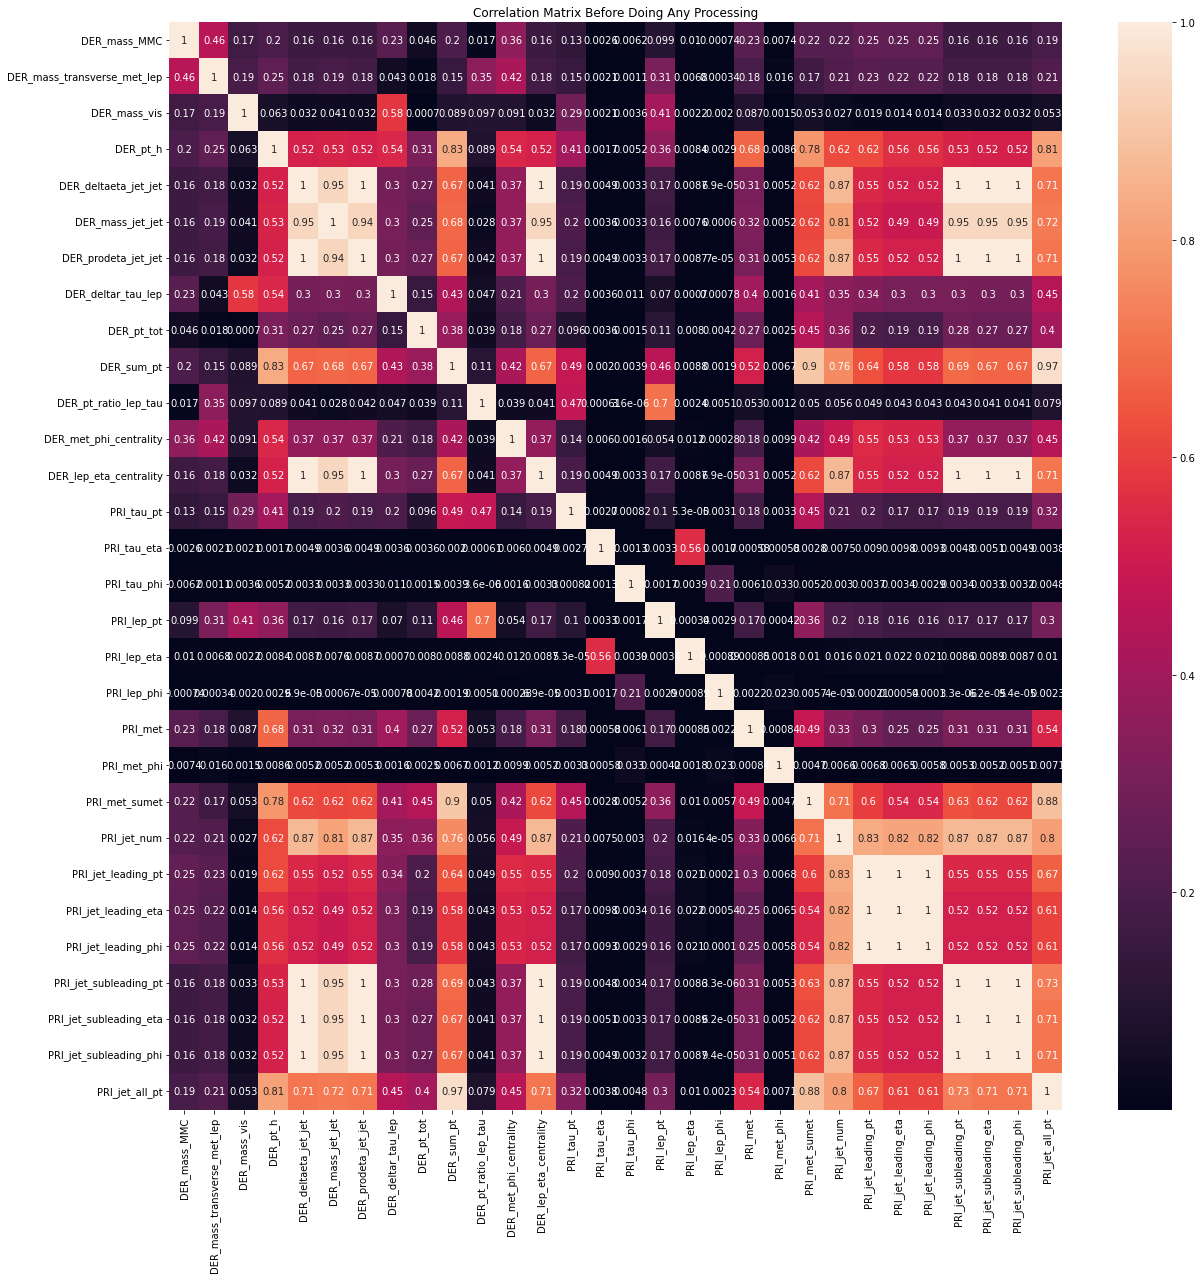

In [ ]:
corr = np.corrcoef(tX.T)
import seaborn as sns
fig, ax = plt.subplots(figsize=(20,20))
sns.heatmap(np.abs(corr), annot=True, fmt='.2g', ax=ax, xticklabels=features, yticklabels=features)
plt.title("Correlation Matrix Before Doing Any Processing")

## Data Preprocessing

### Handling Missing Values - Removing Features with Missing Values more than 70%

In [ ]:
na_per_feature(tX, nobs, name = "Original Tx")
tX_r, cols_removed = remove_na_feature(tX, features, nobs)
features_r = np.delete(features, cols_removed)
na_per_feature(tX_r, nobs, name = "Sec Tx")

Original Tx# of features with unavailable data: 11
Original Tx# of features with unavailable data more than 70%: 7
Sec Tx# of features with unavailable data: 4
Sec Tx# of features with unavailable data more than 70%: 0


### Handling Missing Values - Imputation by Median

In [ ]:
na_per_feature(tX_r, nobs, name = "Original Tx")
tX_rm = imputation(tX_r, "median")
na_per_feature(tX_rm, nobs, name = "Clean Tx")

Original Tx# of features with unavailable data: 4
Original Tx# of features with unavailable data more than 70%: 0
Clean Tx# of features with unavailable data: 0
Clean Tx# of features with unavailable data more than 70%: 0


### Investigating Correlation Matrix

Text(0.5, 1.0, 'Correlation Matrix After Imputation')

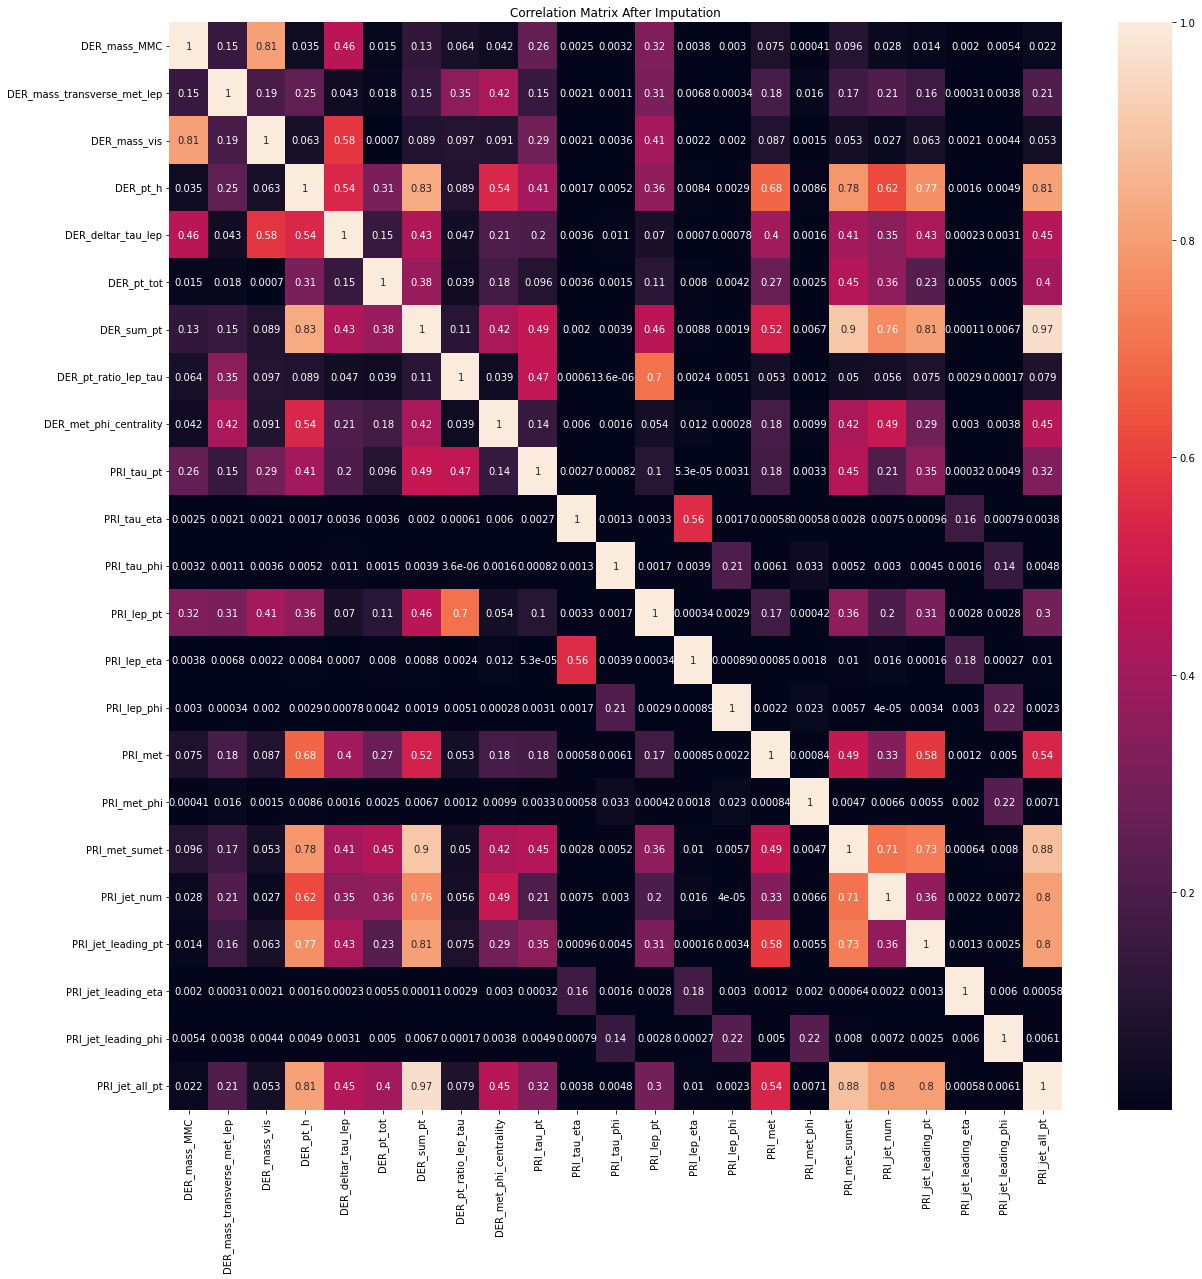

In [ ]:
corr = np.corrcoef(tX_rm.T)
import seaborn as sns
fig, ax = plt.subplots(figsize=(20,20))
sns.heatmap(np.abs(corr), annot=True, fmt='.2g', ax=ax, xticklabels=features_r, yticklabels=features_r)
plt.title("Correlation Matrix After Imputation")

### Removing Dependant Features

In [ ]:
rem_inds = []
print("The Removed features which have very high correlation with any other feature vectors:")
print(features_r[rem_inds])
features_r = np.delete(features_r, rem_inds)
tX_rmr = np.delete(tX_rm, rem_inds, 1)
print("# of features = {n}".format(n=tX_rmr.shape[1]))

The Removed features which have very high correlation with any other feature vectors:
[]
# of features = 23


### Handling Categorical Data by One-Hot Encoding

In [ ]:
cat_inds, nouns = find_categorical_data(tX_rm, 100)
print("\nCategorical features:")
print(features_r[cat_inds])
tX_rmc, feats_rmcat = handle_categorical_feature(tX_rmr, cat_inds, features_r)
print("# of features = {n}".format(n=tX_rmc.shape[1]))


Categorical features:
['PRI_jet_num']
# of features = 26


### Handling Outliers

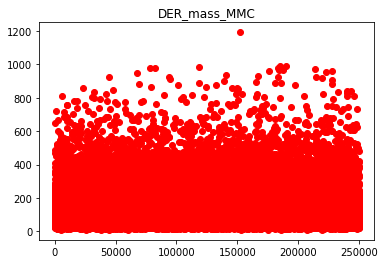

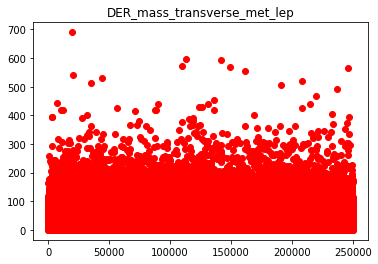

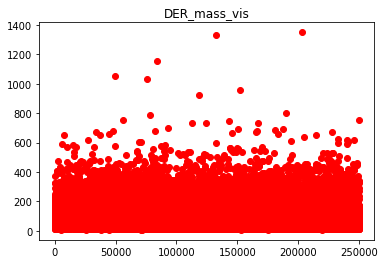

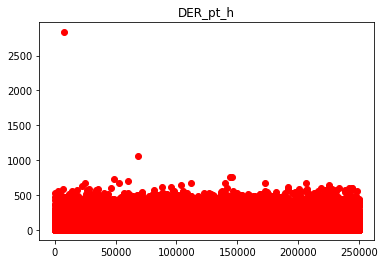

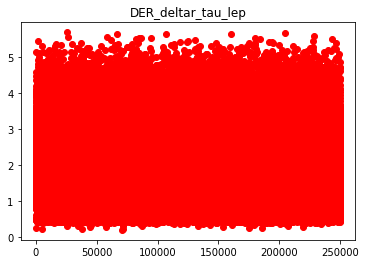

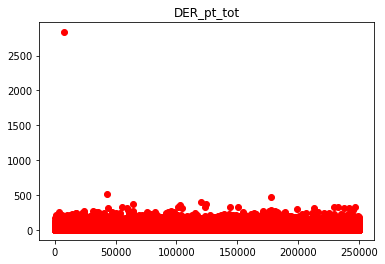

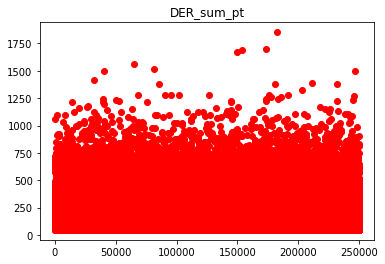

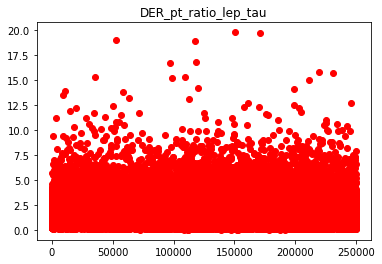

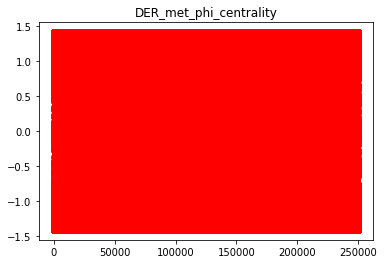

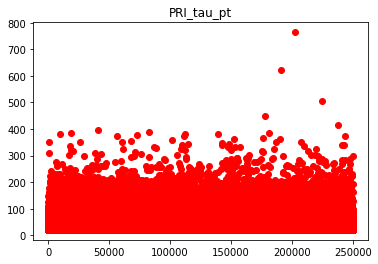

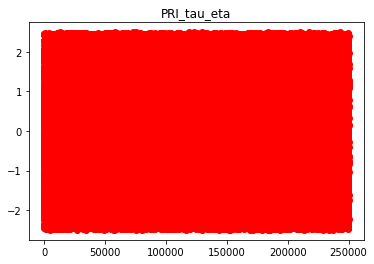

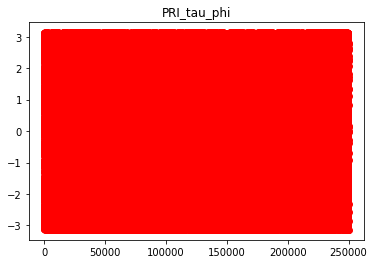

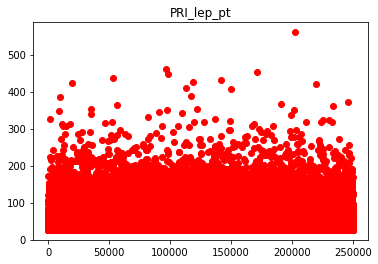

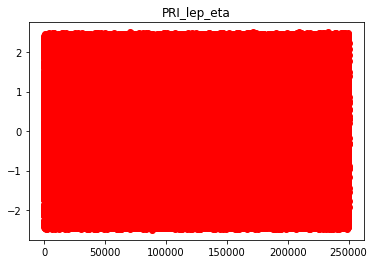

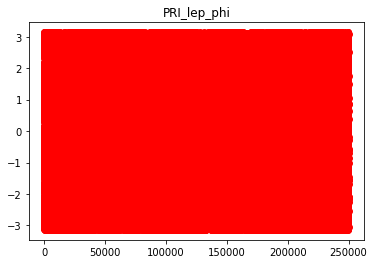

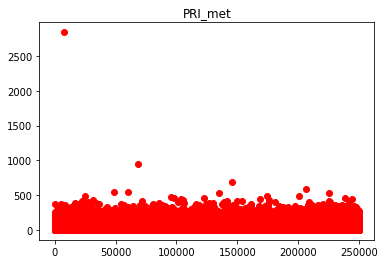

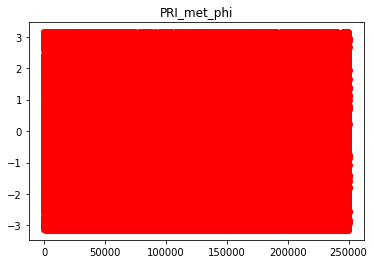

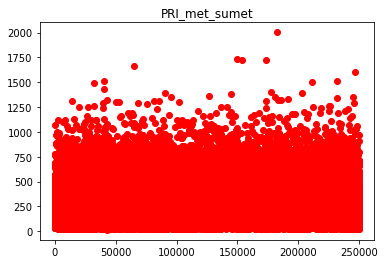

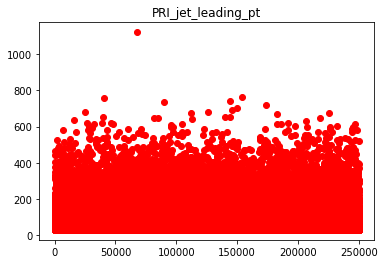

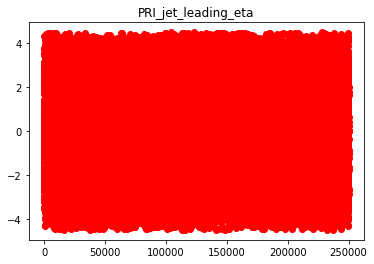

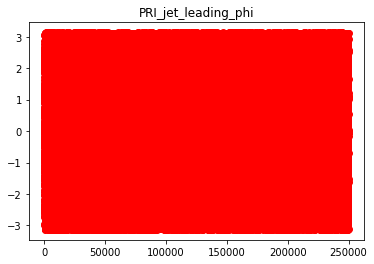

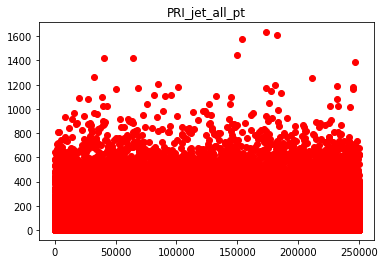

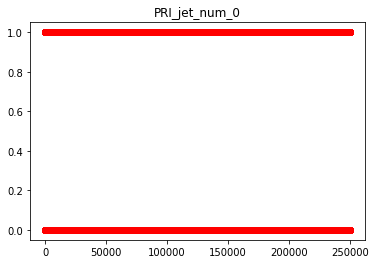

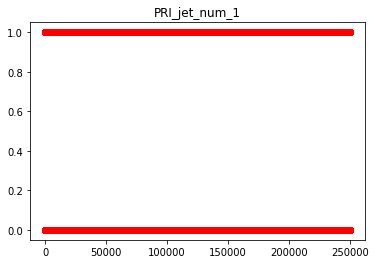

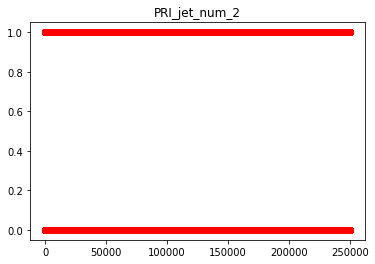

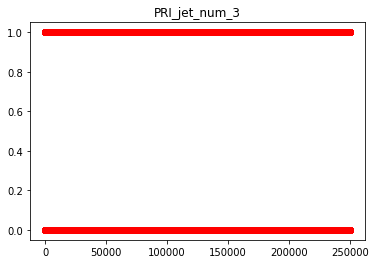

In [ ]:
for i in range(tX_rmc.shape[1]):
        plt.figure()
        plt.plot(tX_rmc[:,i], 'ro')
        plt.title(feats_rmcat[i])
        plt.show()

In [ ]:
print(tX_rmc.shape)
print(np.sum(nouns))
tX_rmch = handle_outliers(tX_rmc, np.sum(nouns))

(250000, 26)
4


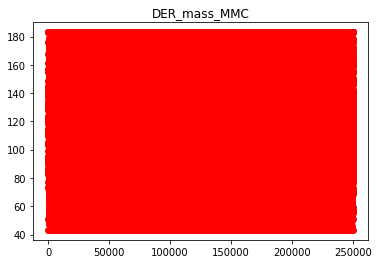

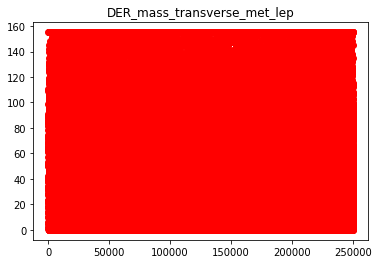

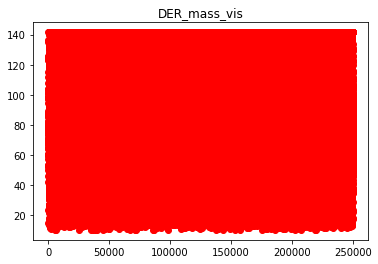

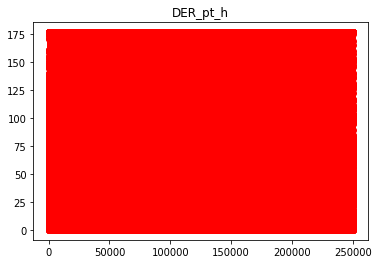

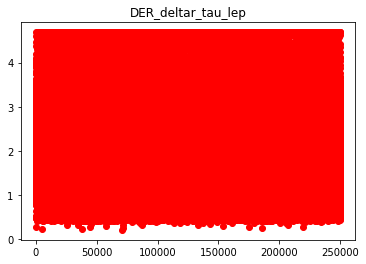

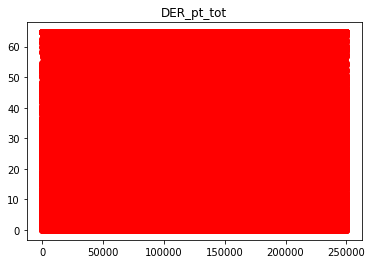

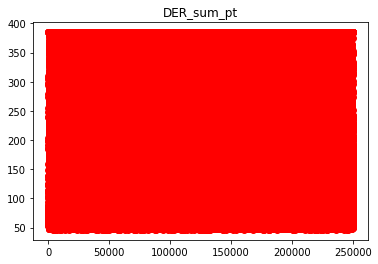

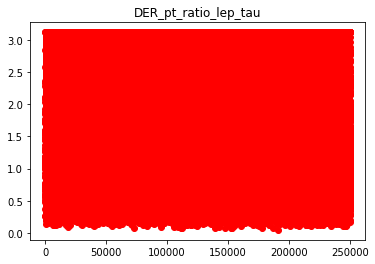

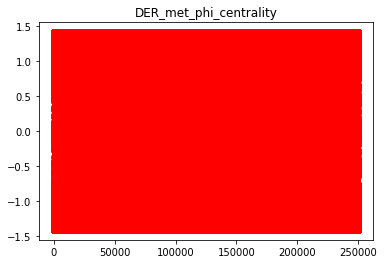

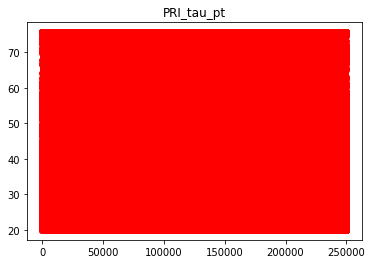

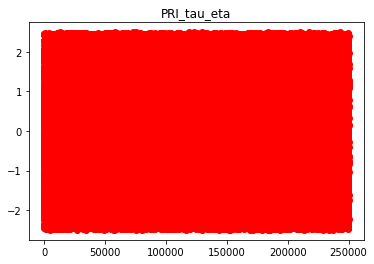

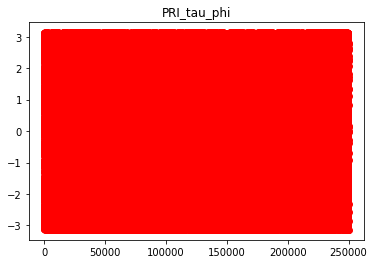

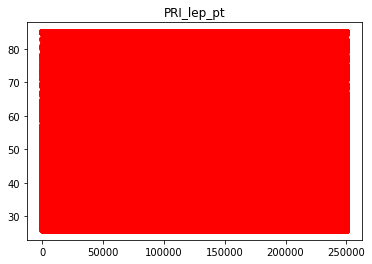

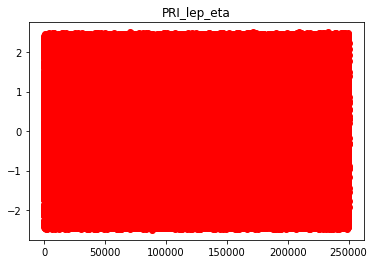

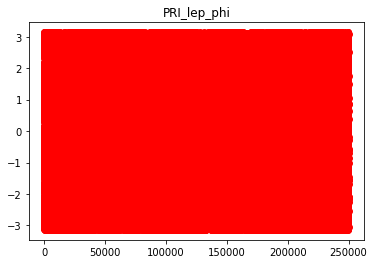

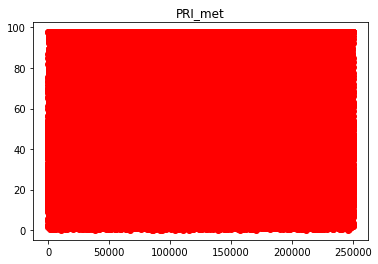

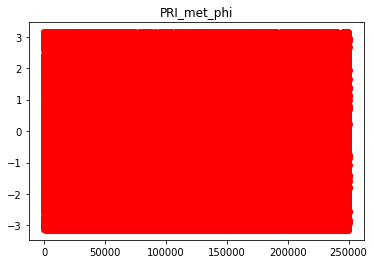

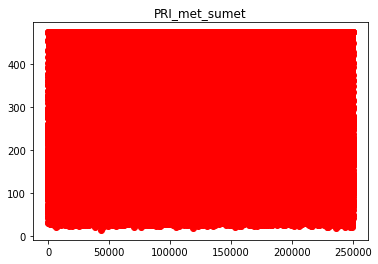

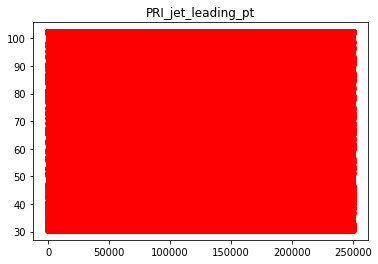

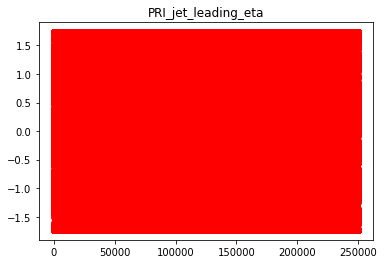

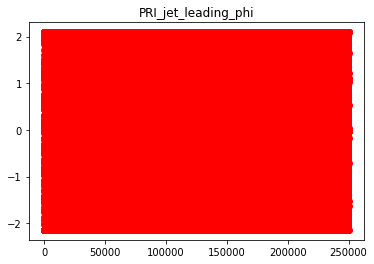

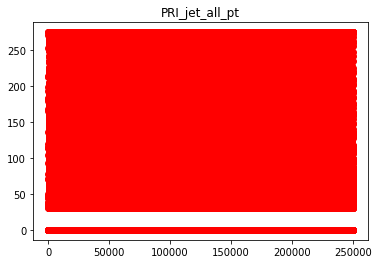

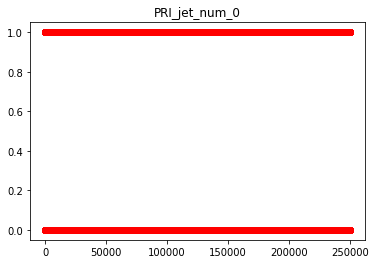

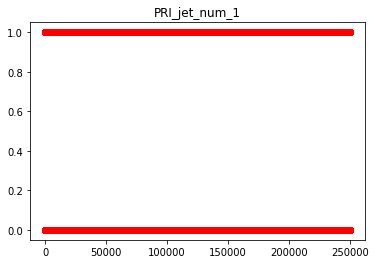

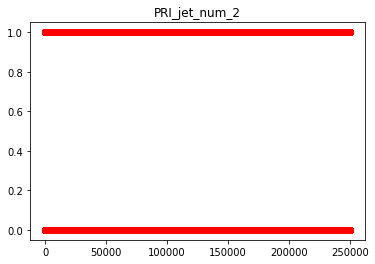

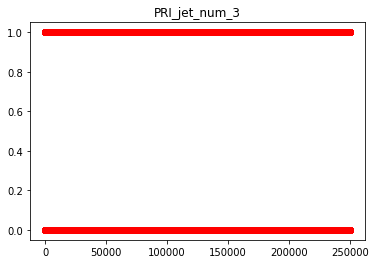

In [ ]:
for i in range(tX_rmch.shape[1]):
        plt.figure()
        plt.plot(tX_rmch[:,i], 'ro')
        plt.title(feats_rmcat[i])
        plt.show()

### Standardization

In [ ]:
tX_rmchs, ms, stds = standardize_dataset(tX_rmc, [np.sum(nouns)])
statistic_feats(tX_rmchs)

[ 1.29318778e-17  2.63185029e-17 -1.15676357e-17  2.09752216e-17
  2.37309984e+00 -6.70752343e-18 -3.01270120e-18 -1.06581410e-18
 -4.09556833e-17 -1.42819090e-17  1.25623956e-17  2.73985279e-17
 -1.17665877e-17  1.11981535e-17  2.20552465e-17  2.51247911e-17
 -2.00373051e-17 -4.60431693e-18 -4.91695573e-18 -1.98241423e-17
  1.06297193e-17  5.20117283e-18  2.02931005e-17  4.83169060e-17
  6.76436684e-18 -4.92832442e-17]
[1.         1.         1.         1.         0.78290955 1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.        ]


### Feature Augmentation by Polynomial Extension

In [ ]:
degree = 13
tX_rmcp, new_cat_inds = build_poly(tX_rmchs, degree, sum(nouns))
print("Feature is augmented with degree of {deg}".format(deg=degree))
print("Before pol.deg # of feat = {of}".format(of=tX_rmchs.shape[1]))
print("After pol.deg # of feat = {nf}".format(nf=tX_rmcp.shape[1]))

Feature is augmented with degree of 13
Before pol.deg # of feat = 26
After pol.deg # of feat = 290


### Adding Feature for Offset Term

In [ ]:
tX_rmcpso = add_feat_offset(tX_rmcp)
print("Before offset # of feat = {of}".format(of=tX_rmcp.shape[1]))
print("After offset # of feat = {nf}".format(nf=tX_rmcpso.shape[1]))

Before offset # of feat = 290
After offset # of feat = 291


### Splitting Dataset into Training & Testing Once for Methods without Cross Validation

In [ ]:
ratio_train = 0.9
tx_tr, tx_te, y_tr, y_te = split_data(tX_rmcpso, y, ratio_train, seed=1)
print("Dataset is splitted")
print("Train data size = {tr_data}".format(tr_data=len(y_tr)))
print("Test data size = {te_data}".format(te_data=len(y_te)))

Dataset is splitted
Train data size = 224999
Test data size = 25000


# Applying ML Models

#### Data Preprocessing in One Function

In [ ]:

# take 9 as example to run the function

pol_degree = 9
rem_inds = []
from helpers_data import *

y_clean, tX_clean, ms, stds = preprocess_dataset(y, tX, features, pol_degree, rem_inds)


### **Least Square Estimation**

LS Cross Validation: 1/5
LS k=0: loss_train = 0.27616875247743655, acc_train = 81.634, loss_test = 0.519235409277229, acc_test = 81.634
LS Cross Validation: 2/5
LS k=1: loss_train = 0.2756030075507413, acc_train = 81.74, loss_test = 2152.0514733897257, acc_test = 81.74
LS Cross Validation: 3/5
LS k=2: loss_train = 0.27988594930825655, acc_train = 81.592, loss_test = 2.6622485430329784e+18, acc_test = 81.592
LS Cross Validation: 4/5
LS k=3: loss_train = 0.27709613265995015, acc_train = 81.458, loss_test = 0.27867780185620855, acc_test = 81.458
LS Cross Validation: 5/5
LS k=4: loss_train = 0.27838463031812966, acc_train = 81.358, loss_test = 0.619967061631032, acc_test = 81.358
LS of resulted average w: loss_train = 0.27742769446290283, acc_train = 81.5564, loss_test = 5.324497086065961e+17, acc_test = 81.5564, var_train = 0.018008639999999354, var_test = 0.018008639999999354


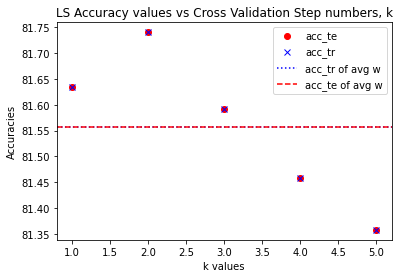

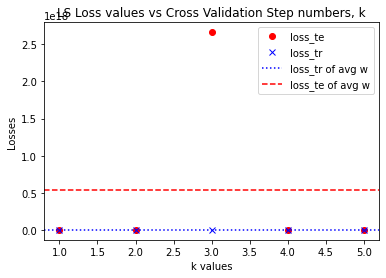

In [ ]:
k_fold = 5
from implementations import *
w = cross_validation_LS(y_clean, tX_clean, k_fold)

LS degree=1: loss_train = 0.33775566529182166, acc_train = 74.552, loss_test = 0.33978561689244163, acc_test = 74.552
LS degree=2: loss_train = 0.31527047184423124, acc_train = 77.436, loss_test = 0.3165738177670729, acc_test = 77.436
LS degree=3: loss_train = 0.3041594079157455, acc_train = 78.716, loss_test = 0.3064795602817768, acc_test = 78.716
LS degree=4: loss_train = 0.2984298131515668, acc_train = 79.368, loss_test = 0.3026045964420883, acc_test = 79.368
LS degree=5: loss_train = 0.29559693968610157, acc_train = 79.72, loss_test = 0.2989095918432631, acc_test = 79.72
LS degree=6: loss_train = 0.29310061797858705, acc_train = 79.916, loss_test = 0.29558621474658964, acc_test = 79.916
LS degree=7: loss_train = 0.2898566757580857, acc_train = 80.32, loss_test = 0.4274834380559709, acc_test = 80.32
LS degree=8: loss_train = 0.2840943084175915, acc_train = 80.708, loss_test = 0.37903836632065463, acc_test = 80.708
LS degree=9: loss_train = 0.27589487408193825, acc_train = 81.256, lo

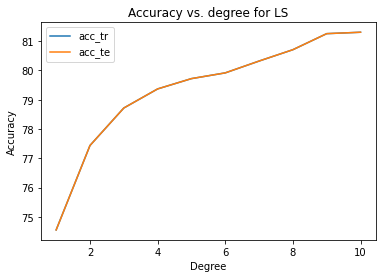

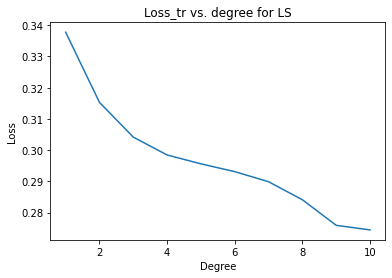

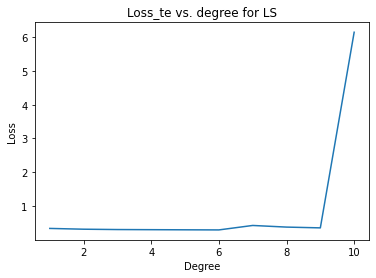

10

In [ ]:
# The only hyperparameter is degree
from implementations import *
degrees = np.linspace(1,10,10).astype(int)
grid_search_degree_LS(y, tX, degrees, features, rem_inds)

LS Cross Validation: 1/10
LS k=0: loss_train = 0.27635550869777653, acc_train = 81.632, loss_test = 0.5136552626395499, acc_test = 81.632
LS Cross Validation: 2/10
LS k=1: loss_train = 0.27626364723788793, acc_train = 81.636, loss_test = 0.43652919692213626, acc_test = 81.636
LS Cross Validation: 3/10
LS k=2: loss_train = 0.27632210837194005, acc_train = 81.888, loss_test = 224.0124131626966, acc_test = 81.888
LS Cross Validation: 4/10
LS k=3: loss_train = 0.2754777696219521, acc_train = 81.64, loss_test = 4262.475674740079, acc_test = 81.64
LS Cross Validation: 5/10
LS k=4: loss_train = 0.27564456471375015, acc_train = 81.528, loss_test = 26.129642423357534, acc_test = 81.528
LS Cross Validation: 6/10
LS k=5: loss_train = 0.27603272511668087, acc_train = 81.672, loss_test = 2397261587487498.0, acc_test = 81.672
LS Cross Validation: 7/10
LS k=6: loss_train = 0.27639994162811954, acc_train = 81.144, loss_test = 0.27975616379934753, acc_test = 81.144
LS Cross Validation: 8/10
LS k=7: los

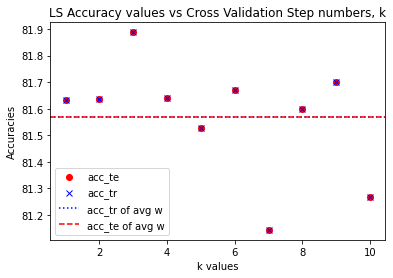

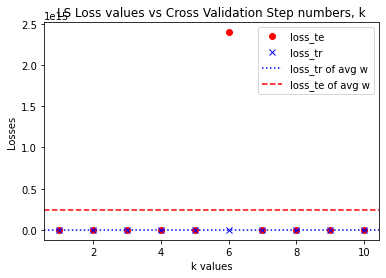

In [ ]:
# Cross validation with the best degree - 9 
from implementations import *

pol_degree = 9
rem_inds = []
y_clean, tX_clean, ms, stds = preprocess_dataset(y, tX, features, pol_degree, rem_inds)
k_fold = 10
w = cross_validation_LS(y_clean, tX_clean, k_fold)

### **Ridge Regression**

RG Cross Validation: 1/10
RG k=0: loss_train = 0.27900843244220963, acc_train = 81.252, loss_test = 0.28183856065083845, acc_test = 81.252
RG Cross Validation: 2/10
RG k=1: loss_train = 0.27919788329747525, acc_train = 81.32, loss_test = 0.2858325667219253, acc_test = 81.32
RG Cross Validation: 3/10
RG k=2: loss_train = 0.2792283592740046, acc_train = 81.36, loss_test = 6.138842527614341, acc_test = 81.36
RG Cross Validation: 4/10
RG k=3: loss_train = 0.2789356669415472, acc_train = 81.152, loss_test = 71.46844400197148, acc_test = 81.152
RG Cross Validation: 5/10
RG k=4: loss_train = 0.27877241837753636, acc_train = 81.208, loss_test = 20.095072034443888, acc_test = 81.208
RG Cross Validation: 6/10
RG k=5: loss_train = 0.2791445223270374, acc_train = 81.356, loss_test = 37609.54333339203, acc_test = 81.356
RG Cross Validation: 7/10
RG k=6: loss_train = 0.2789007933116701, acc_train = 80.916, loss_test = 0.28285154589553946, acc_test = 80.916
RG Cross Validation: 8/10
RG k=7: loss_trai

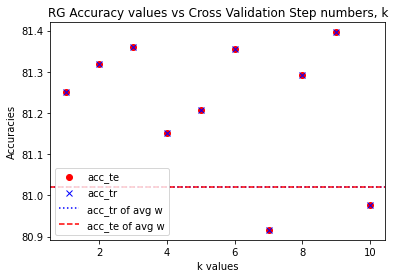

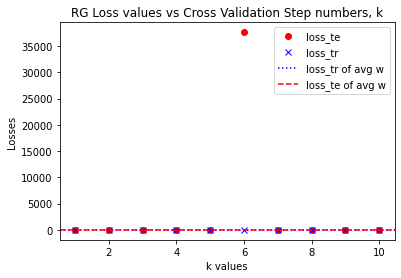

In [ ]:
# with best lambda - 1e-10
lambda_ = 1e-10 
k_fold = 10
pol_degree = 9
rem_inds = []
from implementations import *
y_clean, tX_clean, ms, stds = preprocess_dataset(y, tX, features, pol_degree, rem_inds)
w = cross_validation_RG(y_clean, tX_clean, k_fold, lambda_)

RG lambda=1e-10: loss_train = 0.27533956736960247, acc_train = 81.244, loss_test = 544.6777519981189, acc_test = 81.244
RG lambda=1e-09: loss_train = 0.27779998289526503, acc_train = 81.108, loss_test = 115.76468437918106, acc_test = 81.108
RG lambda=1e-08: loss_train = 0.2819788956348066, acc_train = 80.764, loss_test = 1.3354746726459144, acc_test = 80.764
RG lambda=1e-07: loss_train = 0.28665030938357733, acc_train = 80.304, loss_test = 6.772111279417764, acc_test = 80.304
RG lambda=1e-06: loss_train = 0.2910606608063377, acc_train = 79.848, loss_test = 1.3660678245852667, acc_test = 79.848
RG lambda=1e-05: loss_train = 0.29367287956362154, acc_train = 79.6, loss_test = 0.4000736766527023, acc_test = 79.6
RG lambda=0.0001: loss_train = 0.2960905135009505, acc_train = 79.4, loss_test = 0.4213690902145661, acc_test = 79.4
RG lambda=0.001: loss_train = 0.3005312454041995, acc_train = 78.904, loss_test = 0.30463707849525157, acc_test = 78.904
RG lambda=0.01: loss_train = 0.3093524037937

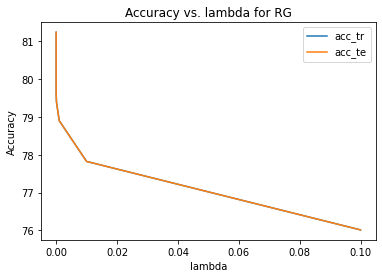

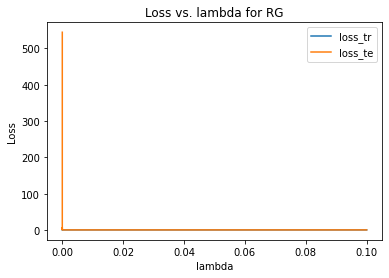

Best lamba is 1e-10


In [ ]:
# The hyperparameters are degree and lambda_. Implement grid_search only on lambda_
lambdas = 10.0 ** (np.arange(10)-10)
best_lambda = grid_search_degree_RG(y, tX, 20, lambdas, features, rem_inds)
print("Best lamba is {blam}".format(blam=best_lambda))


### **Linear Regression with GD**

In [ ]:
gamma = 4e-2
max_iters = 1000
k_fold = 10
div = 10
from implementations import *
from helpers_data import *
import time 
s_time = time.time()

w = cross_validation_least_squares_GD(y_clean, tX_clean, gamma, max_iters, k_fold, div, pol_degree)

Cross Validation: 1/10
GD linear Reg. - 1/100
LS GD k=1: loss_train = 0.32592274819665035, acc_train = 75.99022222222223, loss_test = 0.32848180712955966, acc_test = 75.776
Cross Validation: 2/10
GD linear Reg. - 1/100
LS GD k=2: loss_train = 0.31998066369429345, acc_train = 76.71066666666667, loss_test = 0.3178438306404045, acc_test = 76.968
Cross Validation: 3/10
GD linear Reg. - 1/100
LS GD k=3: loss_train = 0.31638564167263644, acc_train = 77.06933333333333, loss_test = 0.3174694598199034, acc_test = 77.024
Cross Validation: 4/10
GD linear Reg. - 1/100
LS GD k=4: loss_train = 0.31407499467786426, acc_train = 77.28311111111111, loss_test = 0.3321293594432271, acc_test = 77.056
Cross Validation: 5/10
GD linear Reg. - 1/100
LS GD k=5: loss_train = 0.3130433149773123, acc_train = 77.42, loss_test = 0.3116066595061331, acc_test = 77.472
Cross Validation: 6/10
GD linear Reg. - 1/100
LS GD k=6: loss_train = 0.3119265640511865, acc_train = 77.54488888888889, loss_test = 0.311536209833209, 

### **Linear Regression with SGD - Batch 1 size**

Cross Validation: 1/10
Mini Batch1 - Stochastic Gradient Descent(1/2000)
Mini Batch1 - Stochastic Gradient Descent(1001/2000)
LS GD k=1: loss_train = 0.484200451181897, acc_train = 59.704, loss_test = 0.48327241344142113, acc_test = 59.572
Cross Validation: 2/10
Mini Batch1 - Stochastic Gradient Descent(1/2000)
Mini Batch1 - Stochastic Gradient Descent(1001/2000)
LS GD k=2: loss_train = 0.5920391558171956, acc_train = 47.483111111111114, loss_test = 0.5952921032876082, acc_test = 47.296
Cross Validation: 3/10
Mini Batch1 - Stochastic Gradient Descent(1/2000)
Mini Batch1 - Stochastic Gradient Descent(1001/2000)
LS GD k=3: loss_train = 0.59214434218702, acc_train = 47.468444444444444, loss_test = 0.5943454259591883, acc_test = 47.428
Cross Validation: 4/10
Mini Batch1 - Stochastic Gradient Descent(1/2000)
Mini Batch1 - Stochastic Gradient Descent(1001/2000)
LS GD k=4: loss_train = 0.5926469893406914, acc_train = 47.45333333333333, loss_test = 0.5898216015761453, acc_test = 47.564
Cross V

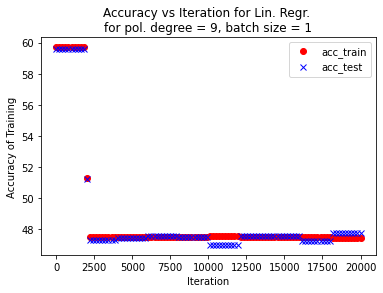

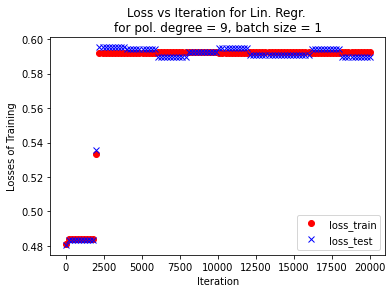

Execution of GD = 12.41263747215271 sec


In [ ]:
gamma = 1e-2
max_iters = 20000
k_fold = 10
div = 200
from implementations import *
import time 
s_time = time.time()
w = cross_validation_least_squares_SGD(y_clean, tX_clean, gamma, 1, max_iters, k_fold, div, pol_degree)
print("Execution of GD = {t} sec".format(t=time.time()-s_time))

### **Linear Regression with mini-batch SGD**

Cross Validation: 1/10
Mini Batch8000 - Stochastic Gradient Descent(1/2000)
Mini Batch8000 - Stochastic Gradient Descent(1001/2000)
LS GD k=1: loss_train = 0.3607533513902889, acc_train = 77.19822222222223, loss_test = 0.3237526749406232, acc_test = 76.924
Cross Validation: 2/10
Mini Batch8000 - Stochastic Gradient Descent(1/2000)
Mini Batch8000 - Stochastic Gradient Descent(1001/2000)
LS GD k=2: loss_train = 0.47259172088663104, acc_train = 77.69511111111112, loss_test = 0.326348947320441, acc_test = 77.98
Cross Validation: 3/10
Mini Batch8000 - Stochastic Gradient Descent(1/2000)
Mini Batch8000 - Stochastic Gradient Descent(1001/2000)
LS GD k=3: loss_train = 0.5985317187536946, acc_train = 78.01955555555556, loss_test = 0.36269173117464487, acc_test = 78.032
Cross Validation: 4/10
Mini Batch8000 - Stochastic Gradient Descent(1/2000)
Mini Batch8000 - Stochastic Gradient Descent(1001/2000)
LS GD k=4: loss_train = 0.3842282643978196, acc_train = 78.24533333333333, loss_test = 3.43644598

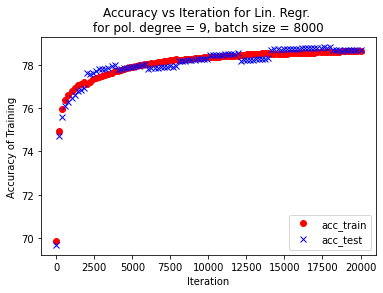

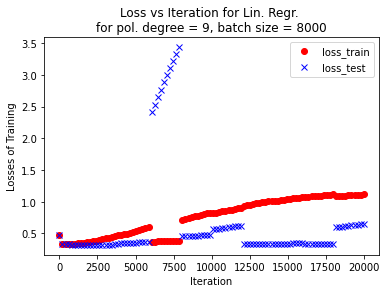

Execution of GD = 44.76227879524231 sec


In [ ]:
gamma = 1e-2
batch_size = 8000
max_iters = 20000
k_fold = 10
div = 200
from implementations import *
import time 
s_time = time.time()
w = cross_validation_least_squares_SGD(y_clean, tX_clean, gamma, batch_size, max_iters, k_fold, div, pol_degree)
print("Execution of GD = {t} sec".format(t=time.time()-s_time))

### **Logistic Regression with GD**

Cross Validation: 1/5


/content/drive/MyDrive/ML_project1/implementations.py:24: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))


LogReg GD k=1: loss_train = -6941.498651653609, acc_train = 75.608, loss_test = -6945.840096872558, acc_test = 75.69
Cross Validation: 2/5
LogReg GD k=2: loss_train = -7070.467584710848, acc_train = 76.2035, loss_test = -7130.605142968757, acc_test = 76.018
Cross Validation: 3/5
LogReg GD k=3: loss_train = -7143.09921901847, acc_train = 76.5385, loss_test = -7109.384702759584, acc_test = 76.54
Cross Validation: 4/5
LogReg GD k=4: loss_train = -7289.5141347816625, acc_train = 76.754, loss_test = -7254.804875146623, acc_test = 76.658
Cross Validation: 5/5
LogReg GD k=5: loss_train = -7102.830250576222, acc_train = 79.117, loss_test = -7074.588715674788, acc_test = 78.998
1000


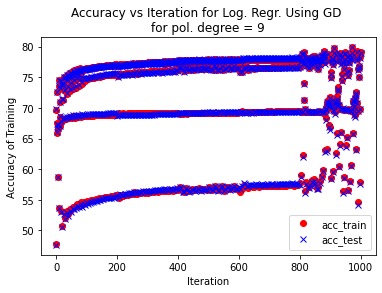

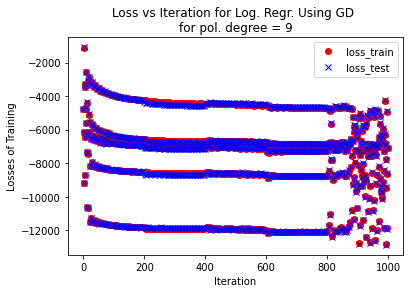

Execution of GD = 197.00574493408203 sec


In [ ]:
gamma = 4e-2
max_iters = 1000
k_fold = 5
div = 1
from implementations import *
import time 
s_time = time.time()
w = cross_validation_log_reg_GD(y_clean, tX_clean, gamma, max_iters, k_fold, div, pol_degree)
print("Execution of GD = {t} sec".format(t=time.time()-s_time))

### **Logistic Regression with SGD**

Cross Validation: 1/10
Regularized Log. Reg - SGD - iter: 1000/20000
Regularized Log. Reg - SGD - iter: 2000/20000
Regularized Log. Reg - SGD - iter: 3000/20000
Regularized Log. Reg - SGD - iter: 4000/20000
Regularized Log. Reg - SGD - iter: 5000/20000
Regularized Log. Reg - SGD - iter: 6000/20000
Regularized Log. Reg - SGD - iter: 7000/20000
Regularized Log. Reg - SGD - iter: 8000/20000
Regularized Log. Reg - SGD - iter: 9000/20000
Regularized Log. Reg - SGD - iter: 10000/20000
Regularized Log. Reg - SGD - iter: 11000/20000
Regularized Log. Reg - SGD - iter: 12000/20000
Regularized Log. Reg - SGD - iter: 13000/20000
Regularized Log. Reg - SGD - iter: 14000/20000
Regularized Log. Reg - SGD - iter: 15000/20000
Regularized Log. Reg - SGD - iter: 16000/20000
Regularized Log. Reg - SGD - iter: 17000/20000
Regularized Log. Reg - SGD - iter: 18000/20000
Regularized Log. Reg - SGD - iter: 19000/20000
Regularized Log. Reg - SGD - iter: 20000/20000
LogReg GD k=1: loss_train = -0.413212788201872

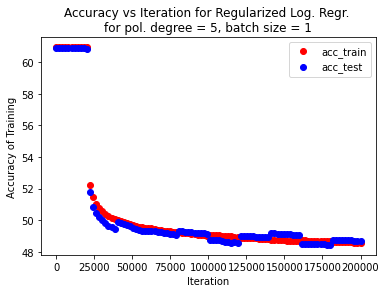

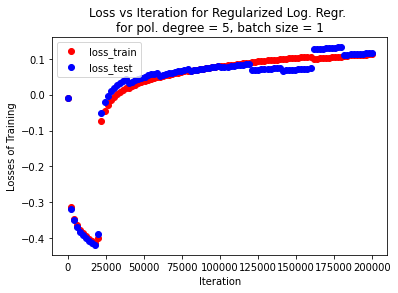

Execution of GD = 14.49851369857788 sec


In [ ]:
gamma = 1e-2
max_iters = 200000
k_fold = 10
div = 2000
from implementations import *
import time 
s_time = time.time()
w = cross_validation_log_regr_reg_SGD(y_clean, tX_clean, gamma, 0, 1, max_iters, k_fold, div, pol_degree)
print("Execution of GD = {t} sec".format(t=time.time()-s_time))

### **Logistic Regression with mini-batch SGD**

In [ ]:
pol_degree = 9
rem_inds = []
from helpers_data import *

y_clean, tX_clean, ms, stds = preprocess_dataset(y, tX, features, pol_degree, rem_inds)

Cross Validation: k = 1/10
Regularized Log. Reg - SGD - iter: 1000/10000
Regularized Log. Reg - SGD - iter: 2000/10000
Regularized Log. Reg - SGD - iter: 3000/10000
Regularized Log. Reg - SGD - iter: 4000/10000
Regularized Log. Reg - SGD - iter: 5000/10000
Regularized Log. Reg - SGD - iter: 6000/10000
Regularized Log. Reg - SGD - iter: 7000/10000
Regularized Log. Reg - SGD - iter: 8000/10000
Regularized Log. Reg - SGD - iter: 9000/10000
Regularized Log. Reg - SGD - iter: 10000/10000
LogReg GD k=1: loss_train = -1.622684593512814, acc_train = 80.68222222222222, loss_test = -1.613207259326774, acc_test = 80.724
Cross Validation: k = 2/10
Regularized Log. Reg - SGD - iter: 1000/10000
Regularized Log. Reg - SGD - iter: 2000/10000
Regularized Log. Reg - SGD - iter: 3000/10000
Regularized Log. Reg - SGD - iter: 4000/10000
Regularized Log. Reg - SGD - iter: 5000/10000
Regularized Log. Reg - SGD - iter: 6000/10000
Regularized Log. Reg - SGD - iter: 7000/10000
Regularized Log. Reg - SGD - iter:

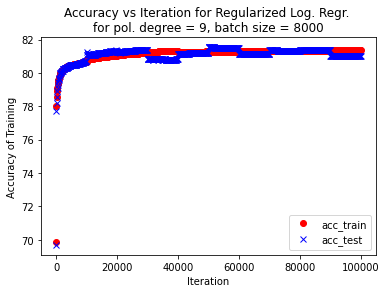

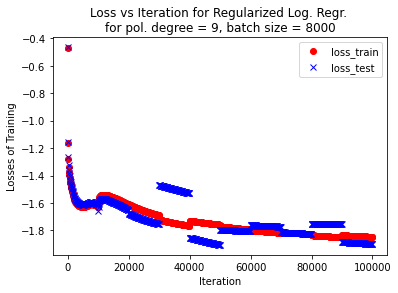

Execution of GD = 387.877539396286 sec


In [ ]:
gamma = 1e-4
batch_size = 8000
max_iters = 100000
k_fold = 10
div = 100
from implementations import *
import time 
s_time = time.time()
w = cross_validation_log_regr_reg_SGD(y_clean, tX_clean, gamma, 0, batch_size, max_iters, k_fold, div, pol_degree)
print("Execution of GD = {t} sec".format(t=time.time()-s_time))

### **Regularized Logistic Regression with mini-batch SGD**

In [ ]:
pol_degree = 5
rem_inds = []
from helpers_data import *

y_clean, tX_clean, ms, stds = preprocess_dataset(y, tX, features, pol_degree, rem_inds)

Cross Validation: k = 1/10
Regularized Log. Reg - SGD - iter: 1000/1000
LogReg GD k=1: loss_train = -1.4741244088906986, acc_train = 79.72977777777778, loss_test = -1.459106766862659, acc_test = 79.66
Cross Validation: k = 2/10
Regularized Log. Reg - SGD - iter: 1000/1000
LogReg GD k=2: loss_train = -1.5526460279855503, acc_train = 80.24844444444444, loss_test = -1.5692488907482627, acc_test = 80.536
Cross Validation: k = 3/10
Regularized Log. Reg - SGD - iter: 1000/1000
LogReg GD k=3: loss_train = -1.6253145087532965, acc_train = 80.45155555555556, loss_test = -1.6371404585822276, acc_test = 80.38
Cross Validation: k = 4/10
Regularized Log. Reg - SGD - iter: 1000/1000
LogReg GD k=4: loss_train = -1.6612778179001142, acc_train = 80.56888888888889, loss_test = -1.5949102973875768, acc_test = 80.4
Cross Validation: k = 5/10
Regularized Log. Reg - SGD - iter: 1000/1000
LogReg GD k=5: loss_train = -1.656482659326909, acc_train = 80.6391111111111, loss_test = -1.6490415015818114, acc_test =

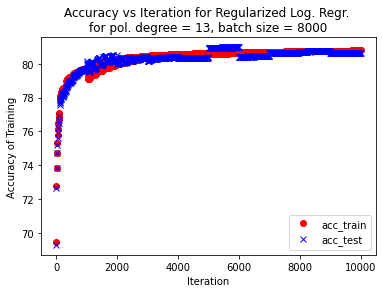

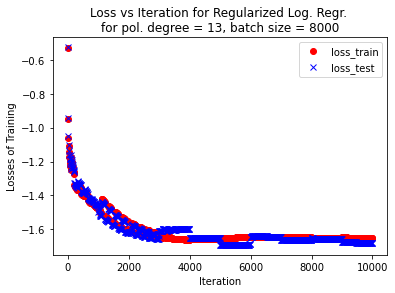


accs_tr var 0.6294300442372348  accs_te_var 0.6583553820000002
Execution of GD = 186.03055787086487 sec


In [ ]:
gamma = 1e-4
lambda_ = 1e-5
batch_size = 8000
max_iters = 10000
k_fold = 10
div = 10
from implementations import *
import time 
s_time = time.time()
w = cross_validation_log_regr_reg_SGD(y_clean, tX_clean, gamma, lambda_, batch_size, max_iters, k_fold, div, pol_degree)
print("Execution of GD = {t} sec".format(t=time.time()-s_time))

# Create CSV Submission

In [ ]:
DATA_TEST_PATH = '../Data/test.csv'
_, tX_test, ids_test = load_csv_data(DATA_TEST_PATH)

In [ ]:
tX_test_clean = preprocess_test_dataset(tX_test, pol_degree, ms, stds, rem_inds)

In [ ]:
# Method linear or logistic ? 
# met = 1: linear, met = 2: logistic
met = 2
if met == 1:
    y_pred = predict_labels(w, tX_test_clean)
else:
    y_pred = predict_labels_LogReg(w, tX_test_clean)
    y_pred = decode_y(y_pred)

In [ ]:
OUTPUT_PATH = '../Data/solution.csv'
create_csv_submission(ids_test, y_pred, OUTPUT_PATH)